In [2]:
df_hitter_perf = pd.read_csv('./data/hitter_perf.csv', index_col=0)
df_hitter_etc = pd.read_csv('./data/hitter_etc.csv', index_col=0)

In [3]:
dfX_hitter_perf = df_hitter_perf[['AVG_A', 'OBP_A', 'SLG_A', 'WAR_A', 'HR%_A', 'BB%_A', 'K%_A', 'BIPA_A', 'Spd_A', 'PSN_A', 'wOBA_A', 'wRC_A', 'wRAA_A', 'AVG_B', 'OBP_B', 'SLG_B', 'WAR_B', 'HR%_B', 'BB%_B', 'K%_B', 'BIPA_B', 'Spd_B', 'PSN_B', 'wOBA_B', 'wRC_B', 'wRAA_B']]
dfX_hitter_perf.columns=['AVG_A', 'OBP_A', 'SLG_A', 'WAR_A', 'HR_A', 'BB_A', 'K_A', 'BIPA_A', 'Spd_A', 'PSN_A', 'wOBA_A', 'wRC_A', 'wRAA_A', 'AVG_B', 'OBP_B', 'SLG_B', 'WAR_B', 'HR_B', 'BB_B', 'K_B', 'BIPA_B', 'Spd_B', 'PSN_B', 'wOBA_B', 'wRC_B', 'wRAA_B']
dfX_hitter_etc = df_hitter_etc[['Spectators','Broadcasting', 'GDP','Clubs','FA_Pitcher','FA_Hitter', 'Age', 'Captain', 'NationalMember', 'Marriage', 'Surgery', 'Transfer', 'GoldenGlove', 'Rookie', 'AllStar']]
dfy_hitter = df_hitter_etc['Salary']

In [4]:
idx = dfy_hitter == '-'
df_hitter = pd.concat([dfX_hitter_perf, dfX_hitter_etc, dfy_hitter], axis=1)
df_hitter['Salary'][idx] = 0
df_hitter = sm.add_constant(df_hitter).astype(float)

/home/dockeruser/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [5]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df_hitter.describe()

,const,AVG_A,OBP_A,SLG_A,WAR_A,HR_A,BB_A,K_A,BIPA_A,Spd_A,PSN_A,wOBA_A,wRC_A,wRAA_A,AVG_B,OBP_B,SLG_B,WAR_B,HR_B,BB_B,K_B,BIPA_B,Spd_B,PSN_B,wOBA_B,wRC_B,wRAA_B,Spectators,Broadcasting,GDP,Clubs,FA_Pitcher,FA_Hitter,Age,Captain,NationalMember,Marriage,Surgery,Transfer,GoldenGlove,Rookie,AllStar,Salary
count,125.0,125.000000,125.000000,125.000000,125.000000,125.00000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,1.250000e+02,125.000000,1.250000e+02,125.000000,125.000000,125.000000,125.00000,125.000000,125.000000,125.0000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,1.0,0.307088,0.389368,0.484120,4.937040,3.10552,10.629600,13.980000,0.333856,4.528800,10.243680,0.388960,83.110400,23.602400,0.279256,0.363096,0.422840,2.344800,2.463760,10.411200,15.175200,0.311360,3.608000,4.713200,0.355152,54.498400,7.214400,5.276634e+06,251.973440,1.191661e+06,8.512000,4.312000,8.704000,34.44800,0.376000,0.680000,0.7760,0.456000,0.280000,1.568000,0.104000,4.168000,6.791680
std,0.0,0.028798,0.037477,0.086538,2.104512,1.92635,3.279458,4.174036,0.027876,1.672685,7.815597,0.044918,27.793419,20.229364,0.039206,0.043117,0.092773,1.761019,1.818149,3.222081,4.959134,0.040938,1.557894,4.411567,0.050292,30.433007,16.878029,1.980147e+06,177.629111,3.025869e+05,0.768492,2.733944,3.136733,2.56671,0.486329,0.468353,0.4186,0.500065,0.450806,1.964754,0.306489,3.063142,5.060301
min,1.0,0.236000,0.298000,0.321000,0.280000,0.00000,3.300000,5.500000,0.260000,1.300000,0.000000,0.282000,9.300000,-14.600000,0.157000,0.261000,0.196000,-0.540000,0.000000,2.400000,7.500000,0.200000,0.100000,0.000000,0.246000,0.400000,-32.100000,2.331978e+06,46.000000,5.768730e+05,8.000000,0.000000,1.000000,28.00000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.289000,0.366000,0.419000,3.420000,1.59000,8.300000,11.000000,0.320000,3.100000,3.780000,0.359000,66.800000,8.200000,0.256000,0.335000,0.367000,1.000000,1.030000,8.000000,11.400000,0.288000,2.700000,1.670000,0.322000,33.600000,-3.300000,3.387843e+06,90.000000,9.197970e+05,8.000000,2.000000,7.000000,33.00000,0.000000,0.000000,1.0000,0.000000,0.000000,0.000000,0.000000,1.000000,2.750000
50%,1.0,0.308000,0.384000,0.475000,5.150000,2.98000,10.300000,13.500000,0.333000,4.400000,8.730000,0.388000,82.300000,21.500000,0.284000,0.366000,0.418000,2.090000,2.250000,10.000000,14.200000,0.309000,3.500000,3.640000,0.355000,55.000000,4.500000,5.928626e+06,212.000000,1.265308e+06,8.000000,3.000000,9.000000,34.00000,0.000000,1.000000,1.0000,0.000000,0.000000,1.000000,0.000000,4.000000,6.000000
75%,1.0,0.324000,0.409000,0.536000,5.970000,4.25000,12.500000,16.300000,0.353000,5.700000,14.440000,0.416000,99.100000,35.500000,0.307000,0.389000,0.480000,3.370000,3.570000,12.400000,17.900000,0.339000,4.500000,6.860000,0.389000,74.900000,15.500000,6.810028e+06,302.000000,1.429445e+06,9.000000,7.000000,12.000000,36.00000,1.000000,1.000000,1.0000,1.000000,1.000000,3.000000,0.000000,7.000000,8.750000
max,1.0,0.393000,0.478000,0.720000,11.770000,8.82000,20.600000,28.100000,0.402000,8.300000,32.730000,0.498000,154.700000,80.700000,0.376000,0.464000,0.789000,8.390000,9.400000,18.700000,28.700000,0.442000,7.800000,21.330000,0.480000,154.700000,68.100000,8.339577e+06,560.000000,1.623840e+06,10.000000,9.000000,12.000000,42.00000,1.000000,1.000000,1.0000,1.000000,1.000000,9.000000,1.000000,12.000000,25.000000


## 1. 독립변수 정규성 검정

In [6]:
sm.stats.stattools.omni_normtest(df_hitter['AVG_A'])

NormaltestResult(statistic=1.2846424659430031, pvalue=0.52606987494231472)

In [7]:
sm.stats.stattools.omni_normtest(df_hitter['OBP_A'])

NormaltestResult(statistic=1.1180887904801353, pvalue=0.57175517484071881)

In [8]:
sm.stats.stattools.omni_normtest(df_hitter['SLG_A'])

NormaltestResult(statistic=3.9614710011418448, pvalue=0.13796772464391227)

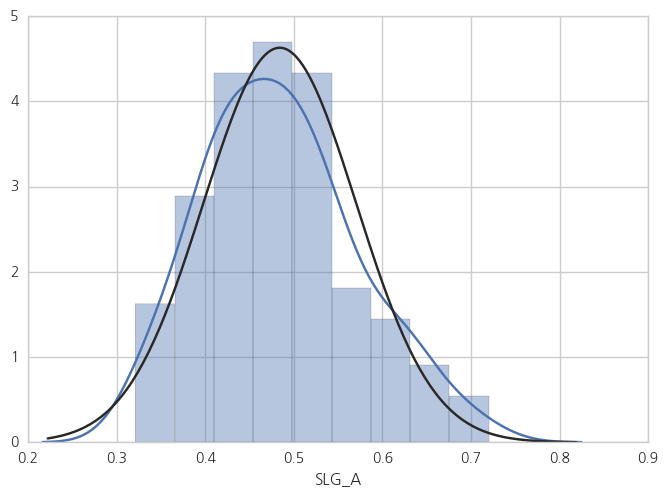

In [9]:
sns.distplot(df_hitter['SLG_A'], fit=sp.stats.norm)
plt.show()

In [10]:
sm.stats.stattools.omni_normtest(df_hitter['WAR_A'])

NormaltestResult(statistic=2.3110937362496049, pvalue=0.31488528908171687)

In [11]:
sm.stats.stattools.omni_normtest(df_hitter['HR_A']), sm.stats.stattools.jarque_bera(df_hitter['HR_A'])[1]

(NormaltestResult(statistic=5.5733833357175762, pvalue=0.061624752191613751),
 0.060042571237857022)

In [12]:
sm.stats.stattools.omni_normtest(df_hitter['BB_A']), sm.stats.stattools.jarque_bera(df_hitter['BB_A'])[1]

(NormaltestResult(statistic=5.5919960914872258, pvalue=0.061053909320385326),
 0.065094253087667156)

In [13]:
sm.stats.stattools.omni_normtest(df_hitter['K_A'])

NormaltestResult(statistic=7.6909084375965326, pvalue=0.021376689661371448)

In [14]:
sm.stats.stattools.omni_normtest(df_hitter['BIPA_A'])

NormaltestResult(statistic=0.44440646969760395, pvalue=0.80075260696123074)

In [15]:
sm.stats.stattools.omni_normtest(df_hitter['Spd_A'])

NormaltestResult(statistic=5.4018328393213384, pvalue=0.067143952498385784)

In [16]:
sm.stats.stattools.omni_normtest(df_hitter['PSN_A'])

NormaltestResult(statistic=14.447504345601743, pvalue=0.00072906171476194671)

In [17]:
sm.stats.stattools.omni_normtest(df_hitter['wOBA_A'])

NormaltestResult(statistic=1.052934250615208, pvalue=0.59068811485831429)

In [18]:
sm.stats.stattools.omni_normtest(df_hitter['wRC_A'])

NormaltestResult(statistic=0.64093243032707092, pvalue=0.72581057428599305)

In [19]:
sm.stats.stattools.omni_normtest(df_hitter['wRAA_A'])

NormaltestResult(statistic=7.8273523705434656, pvalue=0.019966963718109944)

In [20]:
sm.stats.stattools.omni_normtest(df_hitter['AVG_B'])

NormaltestResult(statistic=3.0649735304899886, pvalue=0.21599786291801532)

In [21]:
sm.stats.stattools.omni_normtest(df_hitter['OBP_B'])

NormaltestResult(statistic=0.035722426077468582, pvalue=0.98229735296299769)

In [22]:
sm.stats.stattools.omni_normtest(df_hitter['SLG_B'])

NormaltestResult(statistic=13.676259467207702, pvalue=0.0010721066507910803)

In [23]:
sm.stats.stattools.omni_normtest(df_hitter['WAR_B'])

NormaltestResult(statistic=13.286914967886172, pvalue=0.0013025160213612841)

In [24]:
sm.stats.stattools.omni_normtest(df_hitter['HR_B'])

NormaltestResult(statistic=23.965406304983858, pvalue=6.2514122953174284e-06)

In [25]:
sm.stats.stattools.omni_normtest(df_hitter['BB_B'])

NormaltestResult(statistic=4.0428684387279041, pvalue=0.13246534441333022)

In [26]:
sm.stats.stattools.omni_normtest(df_hitter['K_B'])

NormaltestResult(statistic=13.964308528212888, pvalue=0.00092830124155746986)

In [27]:
sm.stats.stattools.omni_normtest(df_hitter['BIPA_B'])

NormaltestResult(statistic=1.8759457233889374, pvalue=0.39142049515085819)

In [28]:
sm.stats.stattools.omni_normtest(df_hitter['Spd_B'])

NormaltestResult(statistic=2.0611923715412868, pvalue=0.35679418153345449)

In [29]:
sm.stats.stattools.omni_normtest(df_hitter['PSN_B'])

NormaltestResult(statistic=30.663704750828977, pvalue=2.1951344018062514e-07)

In [30]:
sm.stats.stattools.omni_normtest(df_hitter['wOBA_B'])

NormaltestResult(statistic=0.40636837220610666, pvalue=0.81612790816238845)

In [31]:
sm.stats.stattools.omni_normtest(df_hitter['wRC_B'])

NormaltestResult(statistic=4.6265496471043281, pvalue=0.098936720156797123)

In [32]:
sm.stats.stattools.omni_normtest(df_hitter['wRAA_B'])

NormaltestResult(statistic=22.910400005341625, pvalue=1.0594241039242987e-05)

In [33]:
sm.stats.stattools.omni_normtest(df_hitter['Spectators'])

NormaltestResult(statistic=271.11289345670997, pvalue=1.3445693263140138e-59)

In [34]:
sm.stats.stattools.omni_normtest(df_hitter['Broadcasting'])

NormaltestResult(statistic=30.779669205145925, pvalue=2.0714752785558666e-07)

In [35]:
sm.stats.stattools.omni_normtest(df_hitter['GDP'])

NormaltestResult(statistic=74.416875828655336, pvalue=6.9275669810474113e-17)

In [36]:
sm.stats.stattools.omni_normtest(df_hitter['Age'])

NormaltestResult(statistic=0.23847633157626252, pvalue=0.88759638049490919)

In [37]:
sm.stats.stattools.omni_normtest(df_hitter['GoldenGlove'])

NormaltestResult(statistic=36.198563794475703, pvalue=1.3790555029756507e-08)

In [38]:
sm.stats.stattools.omni_normtest(df_hitter['AllStar'])

NormaltestResult(statistic=13.301473701328646, pvalue=0.0012930689556254595)

In [142]:
sm.stats.stattools.omni_normtest(df_hitter['FA_Hitter'])

NormaltestResult(statistic=27.200884702811194, pvalue=1.2399464665633567e-06)

## 2. 독립변수 정규성 검정 after log trans

In [144]:
#로그변환
df_hitter1 = df_hitter.copy()

#df_hitter1["LogHR_A"]= np.log(df_hitter1["HR_A"]+1)
df_hitter1["LogBB_A"]= np.log(df_hitter1["BB_A"]+0)
df_hitter1["LogK_A"]= np.log(df_hitter1["K_A"]+0)
#df_hitter1["LogSpd_A"]= np.log(df_hitter1["Spd_A"]+0)
df_hitter1["LogPSN_A"]= np.log(df_hitter1["PSN_A"]+1)
df_hitter1["LogwRAA_A"]= np.log(df_hitter1["wRAA_A"]+15.6)   #  마이너스

df_hitter1["LogSLG_B"]= np.log(df_hitter1["SLG_B"]+0.804)
df_hitter1["LogWAR_B"]= np.log(df_hitter1["WAR_B"]+1.54)   # 마이너스 
df_hitter1["LogPSN_B"]= np.log(df_hitter1["PSN_B"]+1.1)
df_hitter1["LogHR_B"]= np.log(df_hitter1["HR_B"]+ 1)
df_hitter1["LogK_B"]= np.log(df_hitter1["K_B"]+0)
df_hitter1["LogwRAA_B"]= np.log(df_hitter1["wRAA_B"]+70)   # 마이너스

df_hitter1["LogSpectators"]= np.log(df_hitter1["Spectators"]+0)
df_hitter1["LogBroadcasting"]= np.log(df_hitter1["Broadcasting"]+0)
df_hitter1["LogGDP"]= np.log(df_hitter1["GDP"]+0)
#df_hitter1["LogGoldenGlove"]= np.log(df_hitter1["GoldenGlove"]+1)
df_hitter1["LogAllStar"]= np.log(df_hitter1["AllStar"]+1)
df_hitter1["LogFA_Hitter"]= np.log(df_hitter1["FA_Hitter"]+1)

df_hitter1["LogSalary"]= np.log(df_hitter1["Salary"]+ 1)

#del df_hitter1["HR_A"]
del df_hitter1["BB_A"]
del df_hitter1["K_A"]
#del df_hitter1["Spd_A"]
del df_hitter1["PSN_A"]
del df_hitter1["wRAA_A"]

del df_hitter1["SLG_B"]
del df_hitter1["WAR_B"]
del df_hitter1["HR_B"]
del df_hitter1["PSN_B"]
del df_hitter1["K_B"]
del df_hitter1["wRAA_B"]

del df_hitter1["Spectators"]
del df_hitter1["Broadcasting"]
del df_hitter1["GDP"]
#del df_hitter1["GoldenGlove"]
del df_hitter1["AllStar"]
del df_hitter1["FA_Hitter"]

del df_hitter1["Salary"]

In [40]:
sm.stats.stattools.omni_normtest(df_hitter1['LogHR_A'])

NormaltestResult(statistic=7.1208528925074734, pvalue=0.028426699669448177)

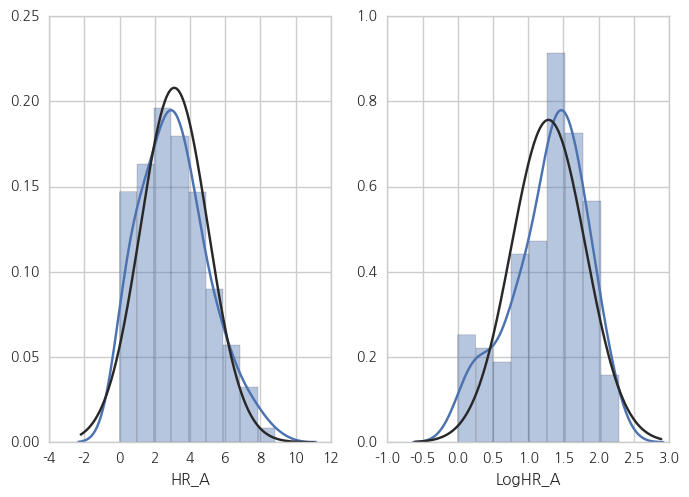

In [41]:
plt.subplot(121)
sns.distplot(df_hitter['HR_A'],fit=sp.stats.norm)
plt.subplot(122)
sns.distplot(df_hitter1['LogHR_A'],fit=sp.stats.norm)
plt.show()

In [42]:
sm.stats.stattools.omni_normtest(df_hitter1['LogBB_A'])

NormaltestResult(statistic=3.9521869206917999, pvalue=0.13860966517560971)

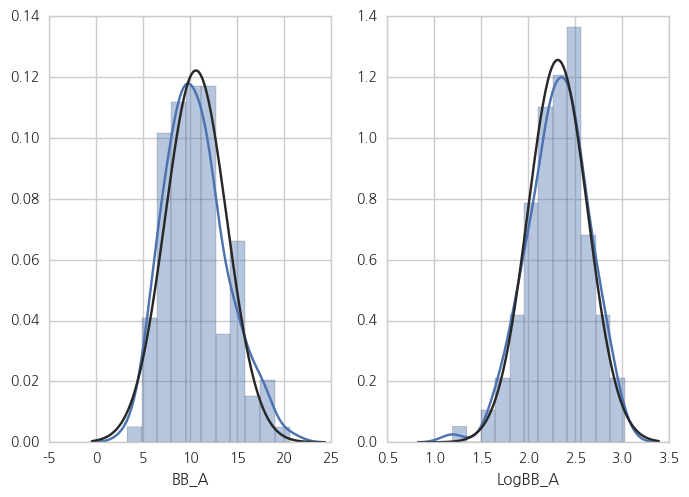

In [43]:
plt.subplot(121)
sns.distplot(df_hitter['BB_A'],fit=sp.stats.norm)
plt.subplot(122)
sns.distplot(df_hitter1['LogBB_A'],fit=sp.stats.norm)
plt.show()

In [44]:
sm.stats.stattools.omni_normtest(df_hitter1['LogK_A'])

NormaltestResult(statistic=2.210015607284864, pvalue=0.33120829760077114)

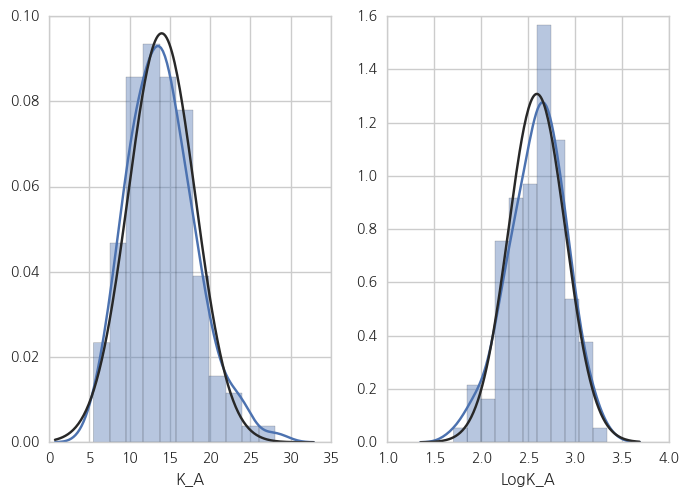

In [45]:
plt.subplot(121)
sns.distplot(df_hitter['K_A'],fit=sp.stats.norm)
plt.subplot(122)
sns.distplot(df_hitter1['LogK_A'],fit=sp.stats.norm)
plt.show()

In [60]:
sm.stats.stattools.omni_normtest(df_hitter1['LogSpd_A'])

NormaltestResult(statistic=6.4199607255926274, pvalue=0.040357405770847267)

In [70]:
sm.stats.stattools.omni_normtest(df_hitter1['LogPSN_A'])

NormaltestResult(statistic=7.4808177608811457, pvalue=0.023744392528524321)

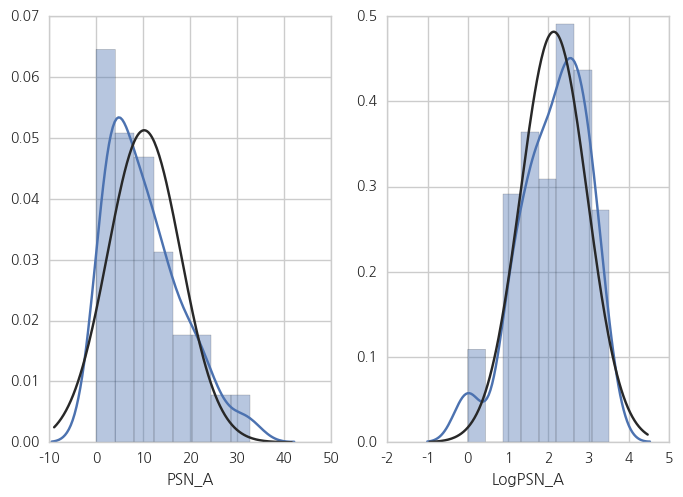

In [72]:
plt.subplot(121)
sns.distplot(df_hitter['PSN_A'],fit=sp.stats.norm)
plt.subplot(122)
sns.distplot(df_hitter1['LogPSN_A'],fit=sp.stats.norm)
plt.show()

In [79]:
sm.stats.stattools.omni_normtest(df_hitter1['LogwRAA_A'])

NormaltestResult(statistic=61.228029165722191, pvalue=5.0641014542742929e-14)

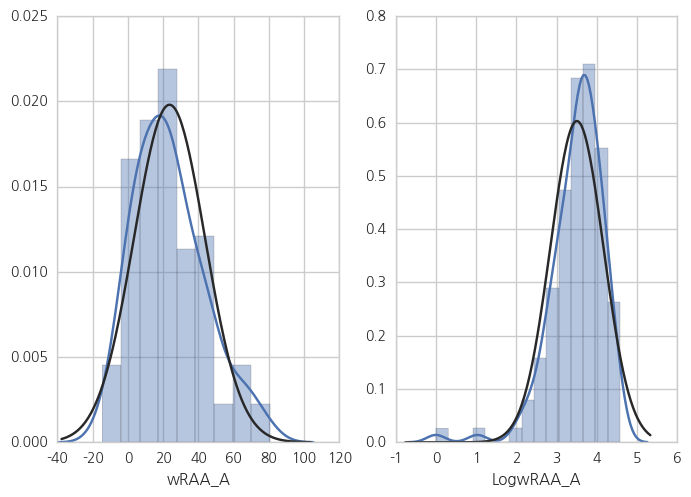

In [80]:
plt.subplot(121)
sns.distplot(df_hitter['wRAA_A'],fit=sp.stats.norm)
plt.subplot(122)
sns.distplot(df_hitter1['LogwRAA_A'],fit=sp.stats.norm)
plt.show()

In [82]:
sm.stats.stattools.omni_normtest(df_hitter1['LogSLG_B'])

NormaltestResult(statistic=5.210813048414769, pvalue=0.073873099889143645)

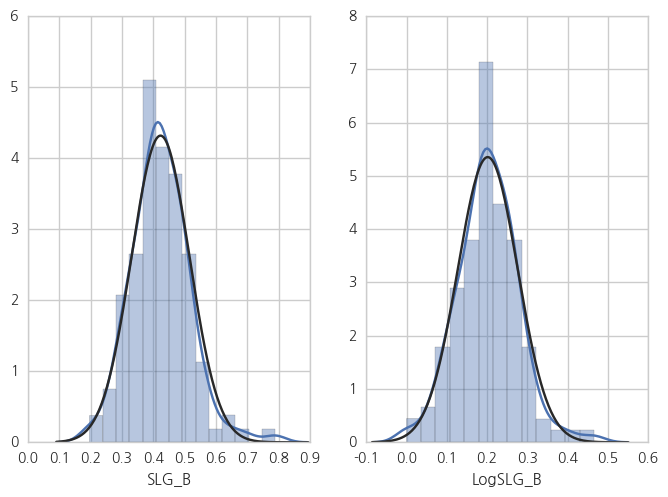

In [84]:
plt.subplot(121)
sns.distplot(df_hitter['SLG_B'],fit=sp.stats.norm)
plt.subplot(122)
sns.distplot(df_hitter1['LogSLG_B'],fit=sp.stats.norm)
plt.show()

In [89]:
sm.stats.stattools.omni_normtest(df_hitter1['LogWAR_B'])

NormaltestResult(statistic=4.6005550970422382, pvalue=0.10023102089027097)

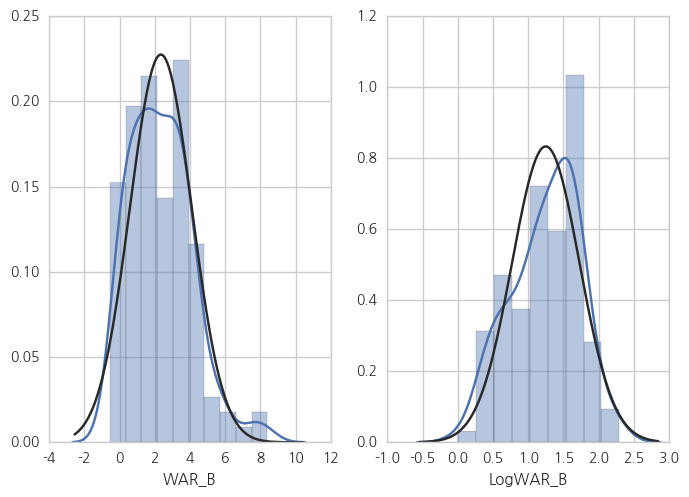

In [90]:
plt.subplot(121)
sns.distplot(df_hitter['WAR_B'],fit=sp.stats.norm)
plt.subplot(122)
sns.distplot(df_hitter1['LogWAR_B'],fit=sp.stats.norm)
plt.show()

In [91]:
sm.stats.stattools.omni_normtest(df_hitter1['LogHR_B'])

NormaltestResult(statistic=5.9912941107721771, pvalue=0.050004261089953671)

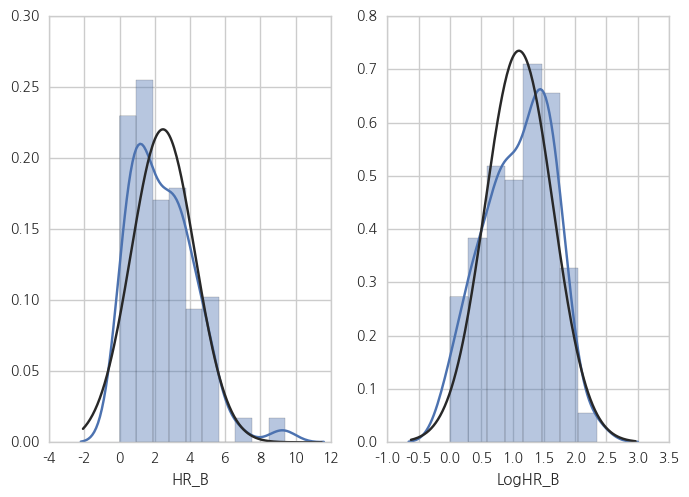

In [92]:
plt.subplot(121)
sns.distplot(df_hitter['HR_B'],fit=sp.stats.norm)
plt.subplot(122)
sns.distplot(df_hitter1['LogHR_B'],fit=sp.stats.norm)
plt.show()

In [95]:
sm.stats.stattools.omni_normtest(df_hitter1['LogK_B'])

NormaltestResult(statistic=4.6661056864071444, pvalue=0.096999171359232111)

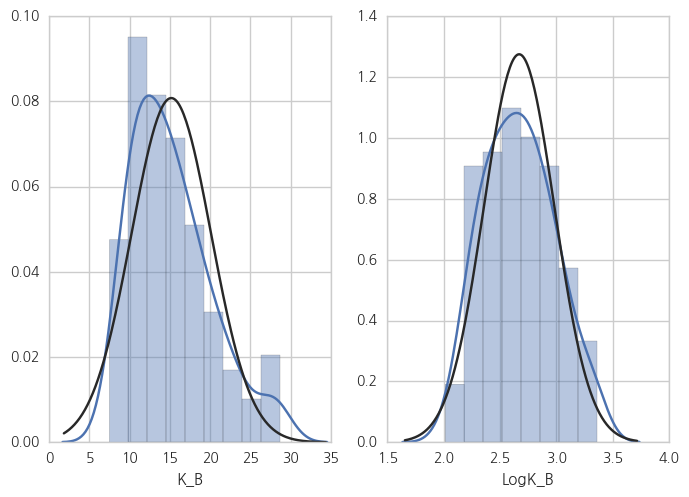

In [94]:
plt.subplot(121)
sns.distplot(df_hitter['K_B'],fit=sp.stats.norm)
plt.subplot(122)
sns.distplot(df_hitter1['LogK_B'],fit=sp.stats.norm)
plt.show()

In [68]:
sm.stats.stattools.omni_normtest(df_hitter1['LogPSN_B'])

NormaltestResult(statistic=12.239198762851725, pvalue=0.0021993368817801728)

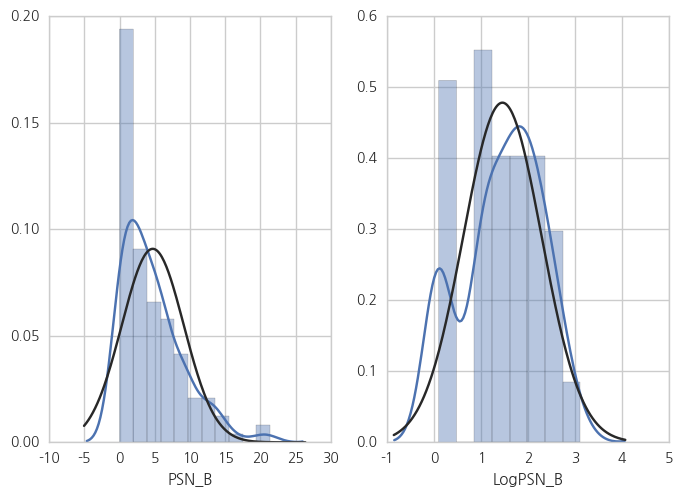

In [69]:
plt.subplot(121)
sns.distplot(df_hitter['PSN_B'],fit=sp.stats.norm)
plt.subplot(122)
sns.distplot(df_hitter1['LogPSN_B'],fit=sp.stats.norm)
plt.show()

In [95]:
sm.stats.stattools.omni_normtest(df_hitter1['LogwRAA_B'])

NormaltestResult(statistic=3.2652471328050736, pvalue=0.19541621359115297)

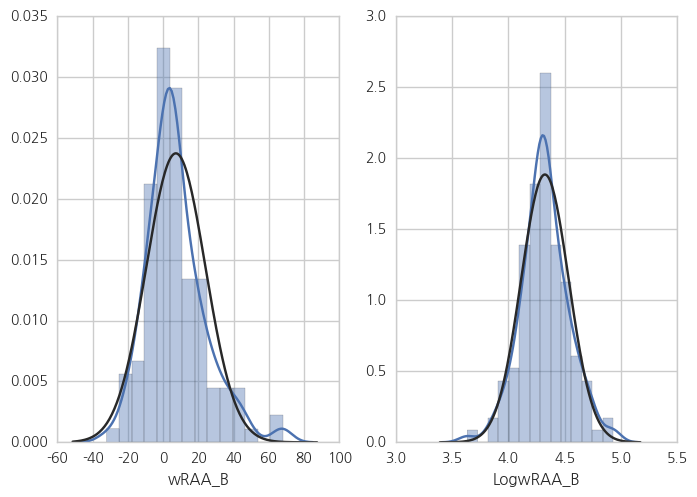

In [96]:
plt.subplot(121)
sns.distplot(df_hitter['wRAA_B'],fit=sp.stats.norm)
plt.subplot(122)
sns.distplot(df_hitter1['LogwRAA_B'],fit=sp.stats.norm)
plt.show()

In [116]:
sm.stats.stattools.omni_normtest(df_hitter1['LogSalary'])

NormaltestResult(statistic=1.3485785360402265, pvalue=0.50951842298653482)

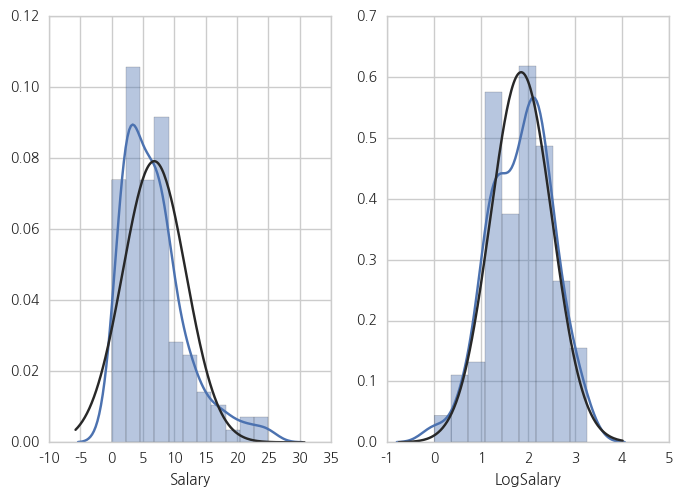

In [115]:
plt.subplot(121)
sns.distplot(df_hitter['Salary'],fit=sp.stats.norm)
plt.subplot(122)
sns.distplot(df_hitter1['LogSalary'],fit=sp.stats.norm)
plt.show()

In [114]:
sm.stats.stattools.omni_normtest(df_hitter1['LogGoldenGlove'])

NormaltestResult(statistic=38.5591903986642, pvalue=4.2362169305855891e-09)

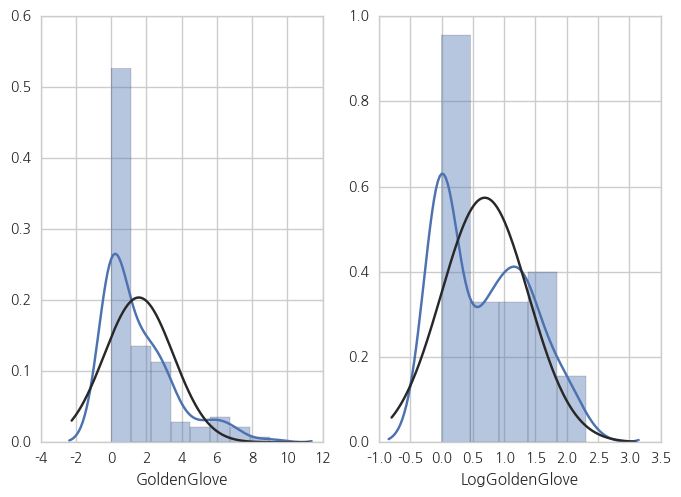

In [115]:
plt.subplot(121)
sns.distplot(df_hitter['GoldenGlove'],fit=sp.stats.norm)
plt.subplot(122)
sns.distplot(df_hitter1['LogGoldenGlove'],fit=sp.stats.norm)
plt.show()

In [140]:
sm.stats.stattools.omni_normtest(df_hitter1['LogAllStar'])

NormaltestResult(statistic=14.195445155413582, pvalue=0.00082698617700386994)

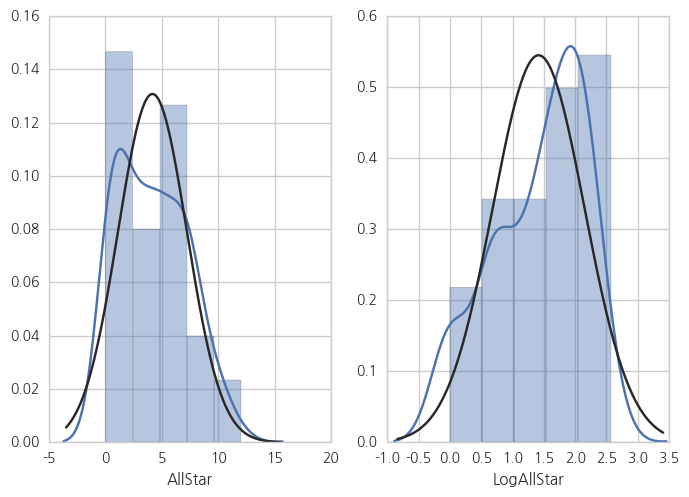

In [141]:
plt.subplot(121)
sns.distplot(df_hitter['AllStar'],fit=sp.stats.norm)
plt.subplot(122)
sns.distplot(df_hitter1['LogAllStar'],fit=sp.stats.norm)
plt.show()

In [145]:
sm.stats.stattools.omni_normtest(df_hitter1['LogFA_Hitter'])

NormaltestResult(statistic=23.169136890117816, pvalue=9.3086317318039919e-06)

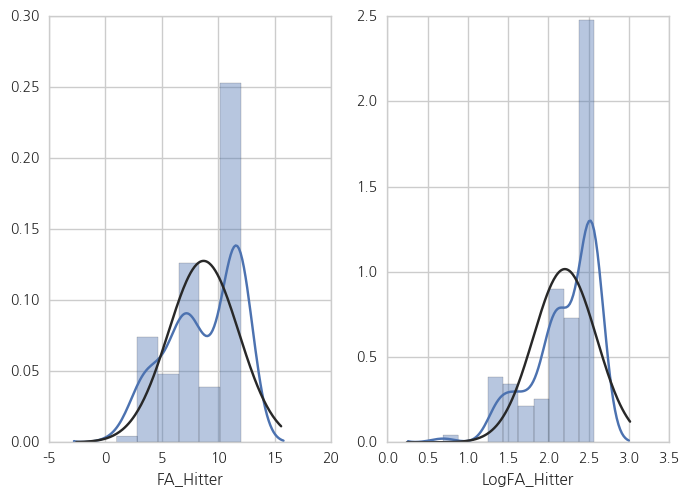

In [147]:
plt.subplot(121)
sns.distplot(df_hitter['FA_Hitter'],fit=sp.stats.norm)
plt.subplot(122)
sns.distplot(df_hitter1['LogFA_Hitter'],fit=sp.stats.norm)
plt.show()

In [150]:
df_hitter2 = df_hitter1.copy()

In [151]:
df_hitter2.head()

,const,AVG_A,OBP_A,SLG_A,WAR_A,HR_A,BIPA_A,Spd_A,wOBA_A,wRC_A,AVG_B,OBP_B,BB_B,BIPA_B,Spd_B,wOBA_B,wRC_B,Clubs,FA_Pitcher,Age,Captain,NationalMember,Marriage,Surgery,Transfer,GoldenGlove,Rookie,LogBB_A,LogK_A,LogPSN_A,LogwRAA_A,LogSLG_B,LogWAR_B,LogPSN_B,LogHR_B,LogK_B,LogwRAA_B,LogSpectators,LogBroadcasting,LogGDP,LogAllStar,LogFA_Hitter,LogSalary
1,1.0,0.284,0.362,0.510,5.50,4.25,0.297,3.5,0.378,76.4,0.287,0.376,10.0,0.291,3.0,0.378,65.1,8.0,4.0,33.0,1.0,0.0,1.0,1.0,1.0,6.0,1.0,2.230014,2.714695,1.534714,3.613617,0.267734,1.650580,1.091923,1.631199,2.468100,4.405499,14.985086,3.828641,13.265377,2.079442,0.693147,1.300192
2,1.0,0.332,0.453,0.533,8.75,3.10,0.355,5.3,0.442,112.4,0.234,0.374,17.2,0.249,3.9,0.363,53.7,8.0,2.0,30.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,2.873565,2.459589,2.917230,4.219508,0.223943,1.401183,2.640485,1.585145,2.862201,4.345103,14.734816,3.912023,13.361672,2.079442,1.609438,1.791759
3,1.0,0.346,0.452,0.624,8.56,5.28,0.365,4.9,0.474,121.4,0.355,0.449,15.1,0.376,4.7,0.431,107.5,8.0,1.0,34.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,2.740840,2.660260,3.268047,4.370713,0.273076,1.717395,2.640485,1.291984,2.341806,4.680278,14.911140,4.382027,13.441784,2.197225,1.386294,2.054124
4,1.0,0.301,0.353,0.367,1.63,0.54,0.321,4.2,0.331,43.0,0.301,0.353,6.2,0.321,4.2,0.331,43.0,8.0,1.0,30.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.824549,2.014903,1.386294,2.251292,0.157858,1.153732,1.410987,0.431782,2.014903,4.157319,14.911140,4.382027,13.441784,0.000000,1.386294,1.252763
5,1.0,0.282,0.419,0.615,7.47,7.74,0.289,3.0,0.432,107.7,0.203,0.311,11.8,0.233,3.6,0.307,40.7,8.0,2.0,32.0,0.0,1.0,1.0,1.0,1.0,3.0,0.0,2.821379,3.077312,2.558776,4.034241,0.195567,1.269761,2.324347,1.752672,3.299534,4.139955,14.688714,4.422809,13.543622,2.079442,1.386294,1.991976
